In [3]:
!pip3 install "opencv-python-headless<4.3"
!pip3 install cellpose

In [2]:
!pip3 install cellpose
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

# Get the folder where our bacterial images are
inp = "Filtered_Img"

input_file_list = os.listdir(inp)

list(enumerate(input_file_list))

>>> GPU activated? NO


[(0, 'WIN_20240904_14_33_13_Pro.jpg'),
 (1, 'WIN_20240904_15_07_00_Pro.jpg'),
 (2, 'WIN_20240904_14_33_24_Pro.jpg'),
 (3, 'WIN_20240904_14_31_24_Pro.jpg'),
 (4, 'WIN_20240904_15_05_35_Pro.jpg'),
 (5, 'WIN_20240904_15_04_20_Pro.jpg'),
 (6, 'WIN_20240904_14_30_48_Pro.jpg'),
 (7, 'WIN_20240904_15_03_54_Pro.jpg'),
 (8, 'WIN_20240904_15_04_07_Pro.jpg'),
 (9, 'WIN_20240904_15_03_43_Pro.jpg'),
 (10, 'WIN_20240904_14_33_41_Pro.jpg'),
 (11, 'WIN_20240904_14_32_36_Pro.jpg'),
 (12, 'WIN_20240904_14_32_53_Pro.jpg'),
 (13, 'WIN_20240904_14_33_51_Pro.jpg'),
 (14, 'WIN_20240904_14_32_04_Pro.jpg'),
 (15, 'WIN_20240904_14_32_19_Pro.jpg'),
 (16, 'WIN_20240904_15_05_21_Pro.jpg'),
 (17, 'WIN_20240904_15_04_57_Pro.jpg'),
 (18, 'WIN_20240904_14_34_10_Pro.jpg'),
 (19, 'WIN_20240904_15_07_25_Pro.jpg'),
 (20, 'WIN_20240904_15_07_12_Pro.jpg'),
 (21, 'WIN_20240904_15_04_33_Pro.jpg'),
 (22, 'WIN_20240904_14_30_32_Pro.jpg'),
 (23, 'WIN_20240904_14_31_05_Pro.jpg'),
 (24, 'WIN_20240904_15_04_46_Pro.jpg'),
 (25, 'WIN

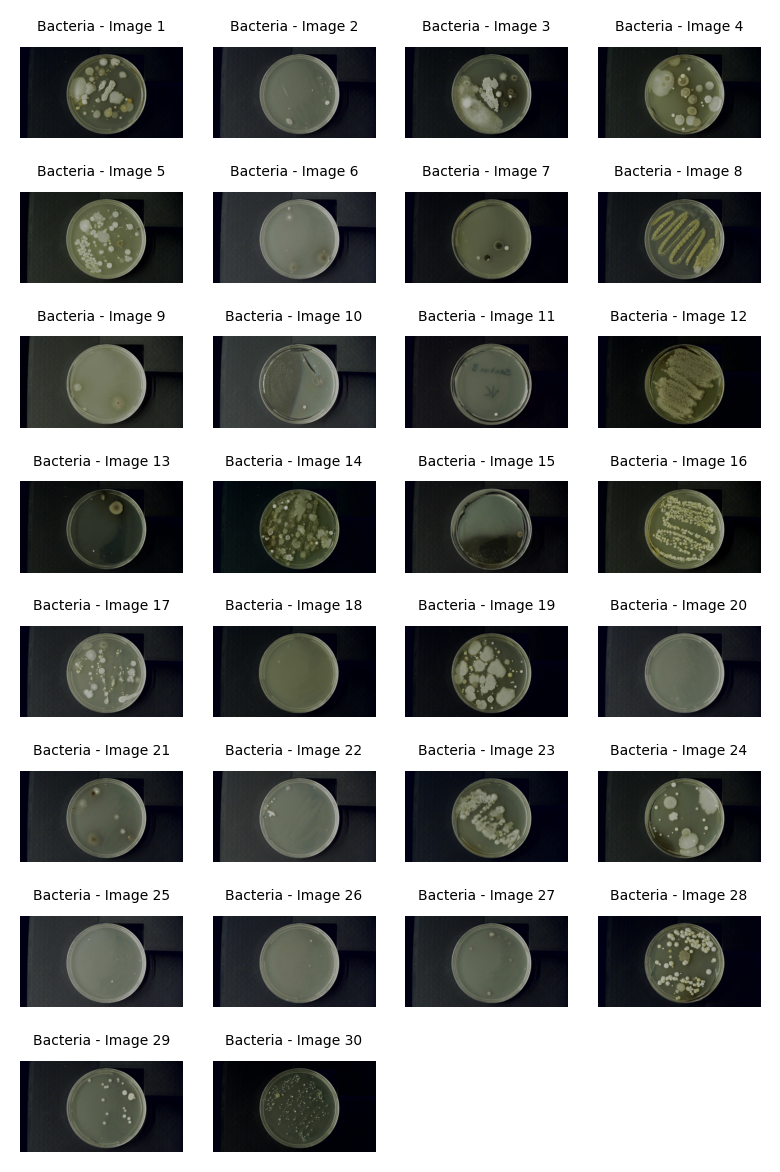

In [4]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
from cellpose import utils, io
import cv2

# download noisy images from website
dat = [
    cv2.cvtColor(cv2.imread(f"{inp}/{path}"), cv2.COLOR_BGR2RGB)
    for path in input_file_list
]

imgs = dat
plt.figure(figsize=(4,6))
for i, iex in enumerate(range(len(input_file_list))):
    img = imgs[iex].squeeze()
    plt.subplot(8,4,1+i)
    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.title(F"Bacteria - Image {i + 1}", fontsize=5)
    plt.axis('off')
plt.tight_layout()
plt.savefig("Bacteria_Images")
plt.show()

In [5]:
# RUN CELLPOSE3

from cellpose import denoise, io

io.logger_setup() # run this to get printing of progress

# DEFINE CELLPOSE MODEL
# model_type="cyto3" or "nuclei", or other model
# restore_type: "denoise_cyto3", "deblur_cyto3", "upsample_cyto3", "denoise_nuclei", "deblur_nuclei", "upsample_nuclei"
model = denoise.CellposeDenoiseModel(gpu=False, model_type="cyto3",
                                     restore_type="denoise_cyto3")

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus
# OR if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]

# if you have a nuclear channel, you can use the nuclei restore model on the nuclear channel with
# model = denoise.CellposeDenoiseModel(..., chan2_restore=True)

# NEED TO SPECIFY DIAMETER OF OBJECTS
# in this case we have them from the ground-truth masks
diams = 30 # dat["diam_test"]

masks, flows, styles, imgs_dn = model.eval([imgs[16]], diameter=diams, channels=[0,0])


2024-09-23 21:27:13,088 [INFO] WRITING LOG OUTPUT TO /home/sarah/.cellpose/run.log
2024-09-23 21:27:13,089 [INFO] 
cellpose version: 	3.0.11 
platform:       	linux 
python version: 	3.12.3 
torch version:  	2.4.1+cu121
2024-09-23 21:27:13,092 [INFO] >> denoise_cyto3 << model set to be used
2024-09-23 21:27:13,093 [INFO] >>>> using CPU
2024-09-23 21:27:13,095 [INFO] >>>> using CPU
2024-09-23 21:27:13,368 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2024-09-23 21:27:13,372 [INFO] >> cyto3 << model set to be used
2024-09-23 21:27:13,373 [INFO] >>>> using CPU
2024-09-23 21:27:13,376 [INFO] >>>> using CPU
2024-09-23 21:27:13,533 [INFO] >>>> loading model /home/sarah/.cellpose/models/cyto3
2024-09-23 21:27:13,693 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


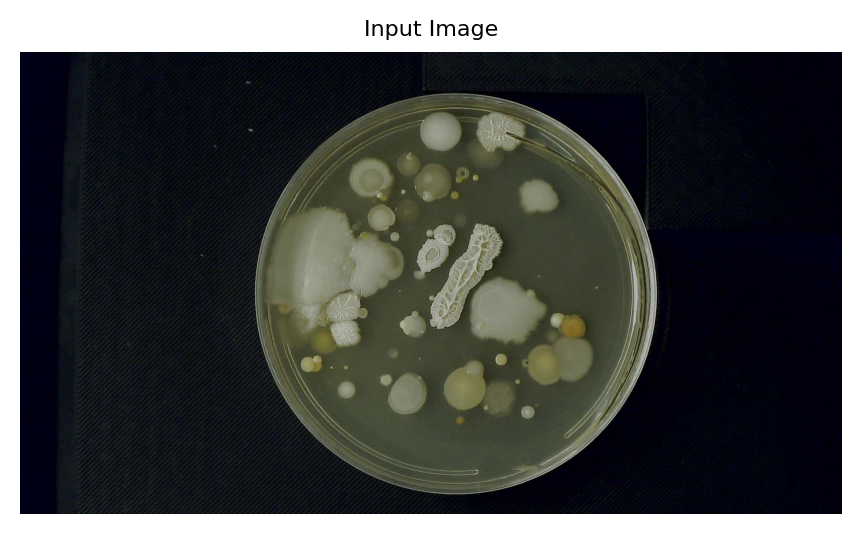

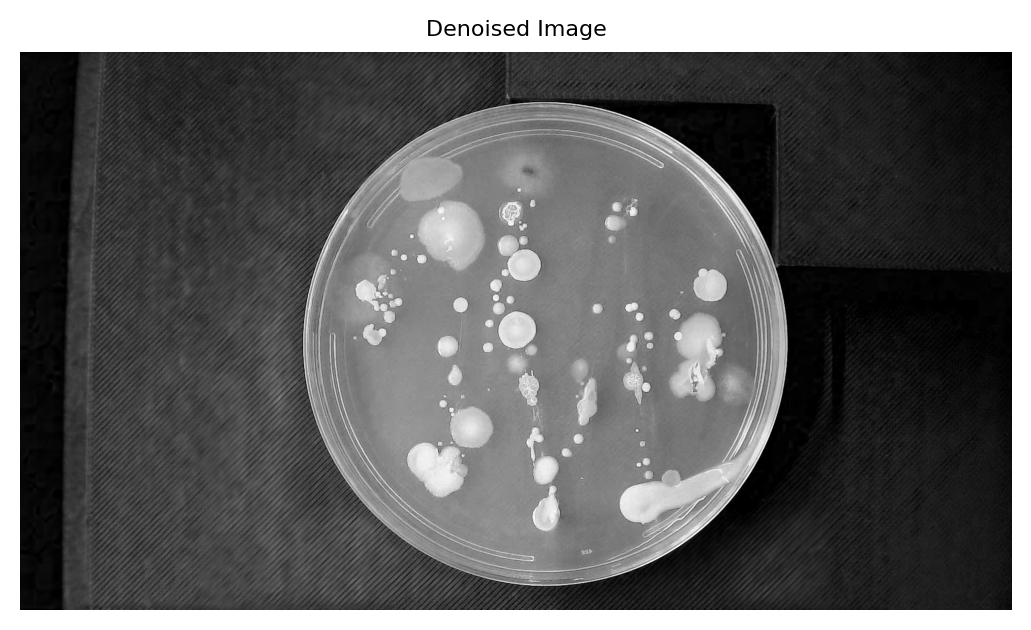

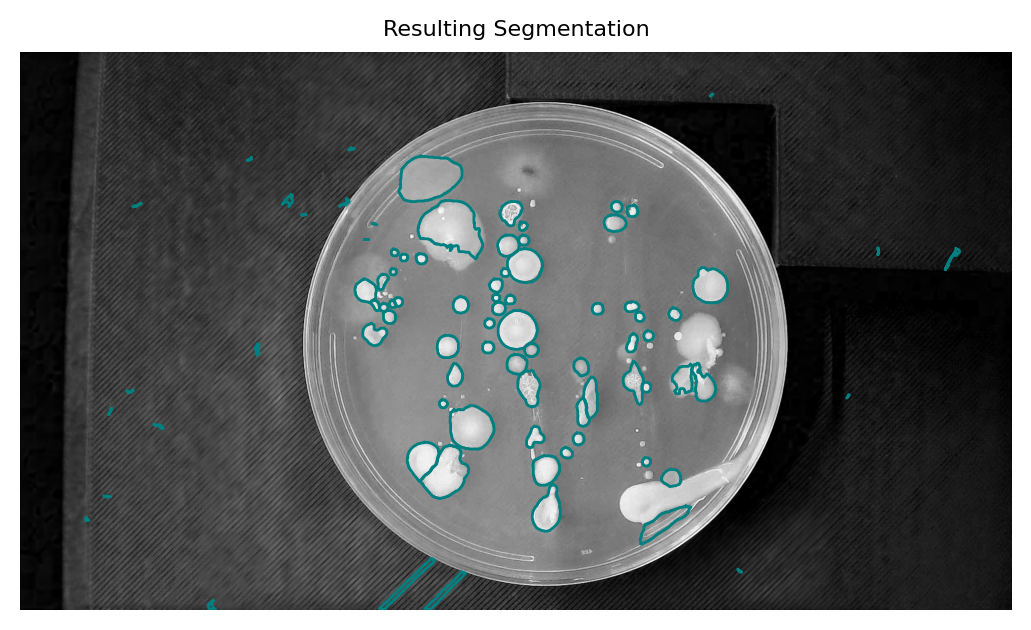

<Figure size 1280x960 with 0 Axes>

In [13]:
plt.figure(figsize=(8,3))
for i, iex in enumerate([0]):
    img = imgs[iex].squeeze()
    # plt.subplot(3,3,1+i)
    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    plt.title("Input Image", fontsize=8)
    plt.savefig("input.png")
    plt.show()

    img_dn = imgs_dn[iex].squeeze()
    # plt.subplot(3,3,4+i)
    plt.imshow(img_dn, cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    plt.title("Denoised Image", fontsize=8)
    plt.savefig("denoised.png")
    plt.show()

    # plt.subplot(3,3,7+i)
    plt.imshow(img_dn, cmap="gray", vmin=0, vmax=1)
    outlines = utils.outlines_list(masks[iex])
    num = 1
    for o in outlines:
        plt.plot(o[:,0], o[:,1], color=[0,0.5,0.5], linewidth=1, label=f"Pt. {num}")
        num += 1
    plt.axis('off')
    plt.title("Resulting Segmentation", fontsize=8)
    plt.savefig("segmentation.png")
    plt.show()

plt.tight_layout()
plt.savefig("New_Model.png")
plt.show()